#  Autism Prediction Project

##  Project Objective
This project aims to predict Autism Spectrum Disorder (ASD) diagnoses using AQ-10 scores and additional demographic/medical features, evaluated through a Random Forest model.

---

##  Context
Autism Spectrum Disorder is a serious lifelong neurodevelopmental condition characterized by impairments in social communication, thinking abilities, activities, and behavior. In children aged two to three years, symptoms become more evident and easier to identify.

The AQ-10 is a brief, 10-question screening tool designed to quickly assess whether someone may have traits associated with autism spectrum conditions. It’s a condensed version of the original AQ-50 test.
It consists of 10 statements with agree/disagree responses.
Each autistic-trait-consistent answer scores 1 point, giving a final score of 0–10.
A score of 6 or more suggests further autism evaluation may be appropriate.

The 10 questions are the following:

1. I often notice small sounds when others do not.

2. I usually concentrate more on the whole picture, rather than the small details. (Reversed Score)

3. I find it easy to do more than one thing at once. (Reversed Score)

4. If there is an interruption, I can switch back to what I was doing very quickly. (Reversed Score)

5. I find it easy to ‘read between the lines’ when someone is talking to me. (Reversed Score)

6. I know how to tell if someone listening to me is getting bored. (Reversed Score)

7. When I’m reading a story, I find it difficult to work out the characters’ intentions.

8. I like to collect information about categories of things (e.g., types of cars, birds, trains, plants).

9. I find it easy to work out what someone is thinking or feeling just by looking at their face. (Reversed Score)

10. I find it difficult to imagine what it would be like to be someone else.

---

##  Dataset Source
The dataset is based on a survey filled out through a mobile app and is described in the IEEE paper:

📎 [IEEE Document Link](https://ieeexplore.ieee.org/document/8679454)

The dataset includes labels indicating whether the person received an autism diagnosis (`Class/ASD` = Yes or No).

---

##  Dataset Features

| Column Name         | Description |
|---------------------|-------------|
| `Case_No`                | Patient identifier  |
| `A1_Score` to `A10_Score` | Scores from 10-item autism screening tool. |
| `Age_Mons`               | Age of the patient in months. |
| `Sex`            | Patient’s sex. |
| `Ethnicity`         | Patient’s ethnicity. |
| `Jaundice`          | Had jaundice at birth? |
| `Family_mem_with_ASD`            | Close family member diagnosed with autism? |
| `Qchat-10-Score`     | Total Score (AQ 1-10) |
| `Who completed the test`   | Who completed the test |
| `Class/ASD`         | **Target variable** (No = No Autism, Yes = Autism). |

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Importing and Exploring Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Potenciales data sets TP final/Salud/Autismo/autismo1.csv')

In [ ]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
data.shape

(1054, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

We can observe there are no null values in the data set.

#Data Preparation and Transformation

In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score'],
      dtype='object')

In [ ]:
categorical_columns = data.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

##Detection of inconsistent values


In [ ]:
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(data[col].value_counts())
    print("-" * 50)

Unique values in 'Sex':
Sex
m    735
f    319
Name: count, dtype: int64
--------------------------------------------------
Unique values in 'Ethnicity':
Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64
--------------------------------------------------
Unique values in 'Jaundice':
Jaundice
no     766
yes    288
Name: count, dtype: int64
--------------------------------------------------
Unique values in 'Family_mem_with_ASD':
Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64
--------------------------------------------------
Unique values in 'Who completed the test':
Who completed the test
family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                  

In [ ]:
data['Who completed the test'] = data['Who completed the test'].str.strip().str.title()
data['Who completed the test'].value_counts()

,count
Who completed the test,
Family Member,1018
Health Care Professional,29
Self,4
Others,3


## Clean String Formatting

In [ ]:
data['Class/ASD Traits'] = data['Class/ASD Traits'].str.strip().str.lower()

In [ ]:
data['Ethnicity'] = data['Ethnicity'].str.strip().str.lower()

##Detection of unnecesary values


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

We'll eliminate Case_No and Who completed the test as they don't provide any real value.

In [ ]:
data = data.drop('Case_No', axis=1)

In [ ]:
data = data.drop('Who completed the test', axis = 1)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,no
1,1,1,0,0,0,1,1,0,0,0,36,4,m,white european,yes,no,yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,hispanic,no,no,yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,white european,no,yes,yes


The columns A1 to A10 and Qchat-10-Score are breaking the No perfect collinearity assumption, affecting the performance and interpretability of the model.

While keeping the Qchat-10-Score would make the model simpler and easier to interpret, the A1-A10 columns improve the model's flexibilty and give us the chance to learn specific patterns of behaviour that are far more valuable than the total score.

In [ ]:
data = data.drop('Qchat-10-Score', axis=1)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,no
1,1,1,0,0,0,1,1,0,0,0,36,m,white european,yes,no,yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,yes
3,1,1,1,1,1,1,1,1,1,1,24,m,hispanic,no,no,yes
4,1,1,0,1,1,1,1,1,1,1,20,f,white european,no,yes,yes


##Detection of atypical values

In [ ]:
data.kurt(numeric_only=True)[:20]

,0
A1,-1.937778
A2,-1.961160
A3,-1.840944
A4,-2.001359
A5,-1.994000
A6,-1.906564
A7,-1.606871
A8,-1.976870
A9,-2.002054
A10,-1.880288


There are no variables with positive kurtosis, showing the data contains less atypical values than the normal distribution.

In [ ]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000


We confirm there are no atypical values such as numbers higher than 1/lower than 0 in A1-A10, or higher than 36/lower than 12 in Age_Mons

##Encoding categorical variables

In [ ]:
categorical_columns

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

In [ ]:
# Renaming column
data.rename(columns={'Class/ASD Traits': 'ASD'}, inplace=True)

le_encoder = le()
data['ASD'] = le_encoder.fit_transform(data['ASD'])

In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,0
1,1,1,0,0,0,1,1,0,0,0,36,m,white european,yes,no,1
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,1
3,1,1,1,1,1,1,1,1,1,1,24,m,hispanic,no,no,1
4,1,1,0,1,1,1,1,1,1,1,20,f,white european,no,yes,1


In [ ]:
data['Sex'] = le_encoder.fit_transform(data['Sex'])

In [ ]:
data['Jaundice'] = le_encoder.fit_transform(data['Jaundice'])

In [ ]:
data['Family_mem_with_ASD'] = le_encoder.fit_transform(data['Family_mem_with_ASD'])

In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,middle eastern,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,white european,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,middle eastern,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,hispanic,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,white european,0,1,1


In [ ]:
data = pd.get_dummies(data, columns=['Ethnicity'], prefix='Ethnicity', drop_first=False).astype(int)

 Dropping one column to avoid multicollinearity

In [ ]:
data = data.drop('Ethnicity_others', axis=1)

In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_native indian,Ethnicity_pacifica,Ethnicity_south asian,Ethnicity_white european
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


##Normalizing numerical values

Turning Age variable from Months to Years for better interpretability

In [ ]:
data['Age_Years'] = data['Age_Mons'] / 12
data = data.drop('Age_Mons', axis=1)

In [ ]:
data['Age_Years'].head(10)

,Age_Years
0,2.333333
1,3.000000
2,3.000000
3,2.000000
4,1.666667
5,1.750000
6,2.750000
7,2.750000
8,3.000000
9,1.833333


In [ ]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex',
       'Jaundice', 'Family_mem_with_ASD', 'ASD', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_hispanic', 'Ethnicity_latino',
       'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_native indian', 'Ethnicity_pacifica',
       'Ethnicity_south asian', 'Ethnicity_white european', 'Age_Years'],
      dtype='object')

# Data Visualization

In [ ]:
#pip install plotly pandas
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio

pio.templates.default = "plotly_dark"

In [ ]:
aq_items = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']

aq_total = data[aq_items].sum(axis=1)

asd_labels = data['ASD'].map({0: 'No ASD', 1: 'ASD'})

fig1 = px.box(
    x=asd_labels,
    y=aq_total,
    color=asd_labels,
    labels={'x': 'ASD Diagnosis', 'y': 'AQ Total Score'},
    title='AQ Total Score by ASD Diagnosis'
)

fig1.show()

In [ ]:
sex_labels = data['Sex'].map({0: 'Female', 1: 'Male'})

fig2 = px.violin(
    x=sex_labels,
    y=aq_total,
    color=sex_labels,
    box=True, points='all',
    title='AQ Total Score by Sex',
    labels={'x': 'Sex', 'y': 'AQ Total Score'}
)

fig2.show()

In [ ]:
ethnicity_cols = [col for col in data.columns if col.startswith("Ethnicity_")]

temp_df = (
    data
    .assign(
        Ethnicity=lambda df: df[ethnicity_cols].idxmax(axis=1).str.replace('Ethnicity_', ''),
        ASD_label=lambda df: df['ASD'].map({1: 'Positive', 0: 'Negative'})
    )
    [['Ethnicity', 'ASD_label']]
)

group_counts = temp_df.groupby(['Ethnicity', 'ASD_label']).size().reset_index(name='Count')
group_counts['Percentage'] = (
    group_counts['Count'] / group_counts.groupby('Ethnicity')['Count'].transform('sum') * 100
)


fig = px.bar(
    group_counts,
    x='Ethnicity',
    y='Percentage',
    color='ASD_label',
    barmode='group',
    title='Percentage of ASD Diagnosis by Ethnicity',
    color_discrete_map={'Positive': '#636EFA', 'Negative': '#EF553B'}
)

fig.update_layout(
    yaxis_title='Percentage (%)',
    xaxis_title='Ethnicity',
    xaxis_tickangle=-45
)

fig.show()


In [ ]:
data_temp = data.assign(
    FamilyLabel=data['Family_mem_with_ASD'].map({0: 'No', 1: 'Yes'}),
    ASDLabel=data['ASD'].map({0: 'Negative', 1: 'Positive'})
)

counts = data_temp.groupby(['FamilyLabel', 'ASDLabel']).size().reset_index(name='Count')
counts['Percentage'] = counts['Count'] / counts.groupby('FamilyLabel')['Count'].transform('sum') * 100

fig4 = px.bar(
    counts,
    x='FamilyLabel',
    y='Percentage',
    color='ASDLabel',
    barmode='group',
    title='ASD Diagnosis by Family History of ASD (Percentage)',
    labels={
        'FamilyLabel': 'Has Family Member with ASD',
        'ASDLabel': 'ASD Diagnosis',
        'Percentage': 'Percentage (%)'
    },
    category_orders={'FamilyLabel': ['No', 'Yes']}
)

fig4.update_layout(
    xaxis_title='Family Member with ASD',
    yaxis_title='Percentage (%)'
)

fig4.show()


In [ ]:
data_temp = data.assign(
    JaundiceLabel=data['Jaundice'].map({0: 'No', 1: 'Yes'}),
    ASDLabel=data['ASD'].map({0: 'Negative', 1: 'Positive'})
)

counts = data_temp.groupby(['JaundiceLabel', 'ASDLabel']).size().reset_index(name='Count')
counts['Percentage'] = counts['Count'] / counts.groupby('JaundiceLabel')['Count'].transform('sum') * 100

fig5 = px.bar(
    counts,
    x='JaundiceLabel',
    y='Percentage',
    color='ASDLabel',
    barmode='group',
    title='ASD Diagnosis by History of Jaundice (Percentage)',
    labels={
        'JaundiceLabel': 'Jaundice at Birth',
        'ASDLabel': 'ASD Diagnosis',
        'Percentage': 'Percentage (%)'
    },
    category_orders={'JaundiceLabel': ['No', 'Yes']}
)

fig5.update_layout(
    xaxis_title='Jaundice at Birth',
    yaxis_title='Percentage (%)'
)

fig5.show()


In [ ]:
aq_items = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']

melted = pd.melt(data, id_vars=['ASD'], value_vars=aq_items,
                 var_name='AQ_Item', value_name='Score')

melted['ASD_label'] = melted['ASD'].map({0: 'Negative', 1: 'Positive'})
melted['Score'] = melted['Score'].map({0: 'Score = 0', 1: 'Score = 1'})

grouped = melted.groupby(['AQ_Item', 'ASD_label', 'Score']).size().reset_index(name='Count')
grouped['Percentage'] = grouped['Count'] / grouped.groupby(['AQ_Item', 'ASD_label'])['Count'].transform('sum') * 100

fig = px.bar(
    grouped,
    x='AQ_Item',
    y='Percentage',
    color='Score',
    barmode='group',
    facet_col='ASD_label',
    title='AQ Item Scores by ASD Diagnosis (Percentage)',
    color_discrete_sequence=['#636EFA', '#EF553B']
)

fig.update_layout(
    xaxis_title='AQ Item',
    yaxis_title='Percentage (%)',
    yaxis_range=[0, 100]
)

fig.show()

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate

## Splitting data into train / test

In [ ]:
features = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex',
            'Jaundice', 'Family_mem_with_ASD', 'Ethnicity_asian', 'Ethnicity_black',
            'Ethnicity_hispanic', 'Ethnicity_latino', 'Ethnicity_middle eastern',
            'Ethnicity_mixed', 'Ethnicity_native indian', 'Ethnicity_pacifica',
            'Ethnicity_south asian', 'Ethnicity_white european', 'Age_Years']
target = ['ASD']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111, stratify=y)

In [ ]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 843 samples
Test set size: 211 samples


In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', random_state=42)

##Training and testing model

Testing Accuracy: 0.9620853080568721
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        65
           1       0.96      0.99      0.97       146

    accuracy                           0.96       211
   macro avg       0.96      0.95      0.95       211
weighted avg       0.96      0.96      0.96       211



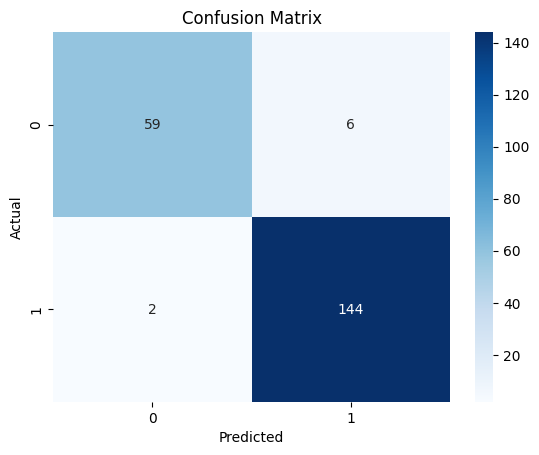

In [ ]:
y_pred = model.predict(X_test)

print("Testing Accuracy:", model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Rating feature importance

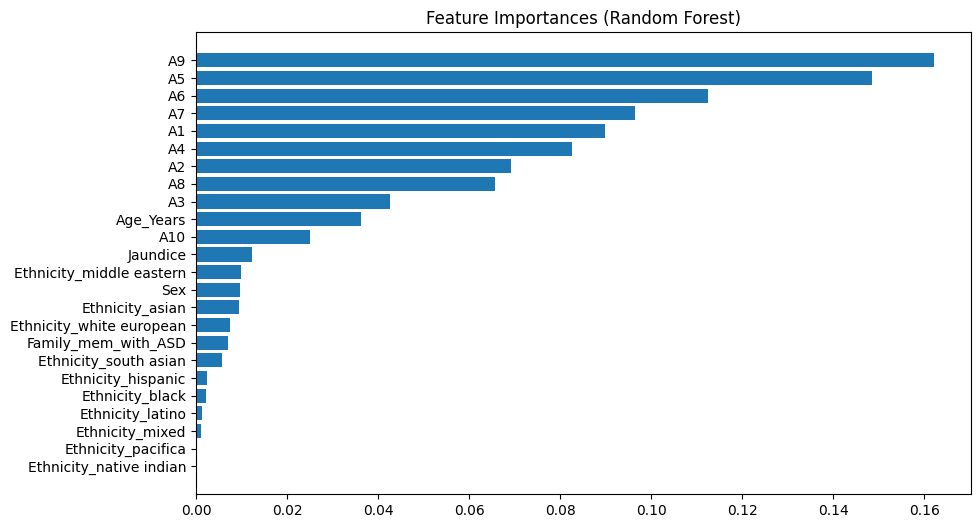

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances (Random Forest)')
plt.show()

| Rank Group | Feature(s)                                       | Interpretation                                                  |
| ---------- | ------------------------------------------------ | --------------------------------------------------------------- |
| 1          | A9                                               | **Most predictive AQ item** for ASD diagnosis                   |
| 2–4        | A5, A6, A7                                       | Strong behavioral indicators; highly influential                |
| 5–9        | A1, A4, A2, A8, A3                               | Moderate importance, still useful for model prediction          |
| 10–12      | Age\_Years, A10, Jaundice                        | Slight contribution, some demographic value                     |
| 13+        | Sex, Ethnicity variables, Family\_mem\_with\_ASD | Minimal influence — little to no unique predictive contribution |


| Rank | Code | AQ-10 Question                                                                                | Domain              |
| ---- | ---- | --------------------------------------------------------------------------------------------- | ------------------- |
| 1    | A9   | I find it easy to work out what someone is thinking or feeling just by looking at their face. | Social Skills       |
| 2    | A5   | I find it easy to read between the lines when someone is talking to me.                       | Communication       |
| 3    | A6   | I know how to tell if someone listening to me is getting bored.                               | Communication       |
| 4    | A7   | When I’m reading a story, I find it difficult to work out the characters’ intentions.         | Imagination         |
| 5    | A1   | I often notice small sounds when others do not.                                               | Attention to Detail |
| 6    | A4   | If there is an interruption, I can switch back to what I was doing very quickly.              | Attention Switching |
| 7    | A2   | I usually concentrate more on the whole picture, rather than the small details.               | Attention Switching |
| 8    | A8   | I find it difficult to work out people’s intentions.                                          | Imagination         |
| 9    | A3   | I find it easy to do more than one thing at once.                                             | Attention Switching |
| 10   | A10  | I find it hard to make new friends.                                                           | Social Skills       |


## Interpreting metrics

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(
    rf,
    X,
    y.values.ravel(),
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize():<8}: {scores.mean():.3f} ± {scores.std():.3f}")

Accuracy: 0.954 ± 0.011
Precision: 0.953 ± 0.011
Recall  : 0.982 ± 0.008
F1      : 0.968 ± 0.008




1. **Accuracy (95.4 % ± 1.1 %)**  
   - Proportion of all predictions (ASD-positive and ASD-negative) that were correct.  
   - High average accuracy and low variability show the model is stable and generalizes well across different splits.

2. **Precision (95.3 % ± 1.1 %)**  
   - Of all cases the model predicted as “ASD-positive,” the fraction that truly had ASD.  
   - A precision of ~95 % means very few false positives, and the low std indicates this holds consistently.

3. **Recall (98.2 % ± 0.8 %)**  
   - Of all actual ASD-positive individuals, the fraction the model correctly identified.  
   - A recall of ~98 % means the model misses very few true ASD cases—critical for a screening tool—and its consistency is high.

4. **F₁ Score (96.8 % ± 0.8 %)**  
   - Harmonic mean of precision and recall, balancing both metrics.  
   - At ~97 %, the F₁ score confirms the model maintains an excellent trade-off between avoiding false positives and capturing true positives, with low variation across folds.



# Conclusions



This project successfully demonstrated that **AQ-10 item scores** are powerful predictors of Autism Spectrum Disorder (ASD) when combined with a small number of demographic and medical features. A Random Forest classifier achieved high performance:

- **High recall (98.2%)** means the model is highly effective at identifying individuals likely to be diagnosed with ASD, minimizing the risk of overlooking cases who may require further assessment.
- **High precision (95.3%)** indicates a low false positive rate.
- The model offers **robust, balanced performance**, suitable for early ASD screening applications in a data-limited environment.

Additionally, analysis of feature importance revealed that AQ items like **A9**, **A5**, **A6**, and **A7** are the most influential indicators in predicting ASD diagnosis, which aligns with clinical expectations.
